In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
#Load the CSV file
file_path = 'CO_North.csv'  
df = pd.read_csv(file_path, skiprows=7)

#Clean the data
df_clean = df[['first', 'second']]  # Select the relevant columns
df_clean.columns = ['Date', 'CO']  # Rename columns for clarity
df_clean = df_clean.drop(0)  # Remove the first row which contains headers

#Convert 'Date' to datetime format and 'Precipitation' to numeric
df_clean['Date'] = pd.to_datetime(df_clean['Date'], format='%m/%d/%y %H:%M')
df_clean['CO'] = pd.to_numeric(df_clean['CO'], errors='coerce')

#Drop any rows with missing precipitation data
df_clean.dropna(subset=['CO'], inplace=True)

#Set the 'Date' column as the index
df_clean.set_index('Date', inplace=True)

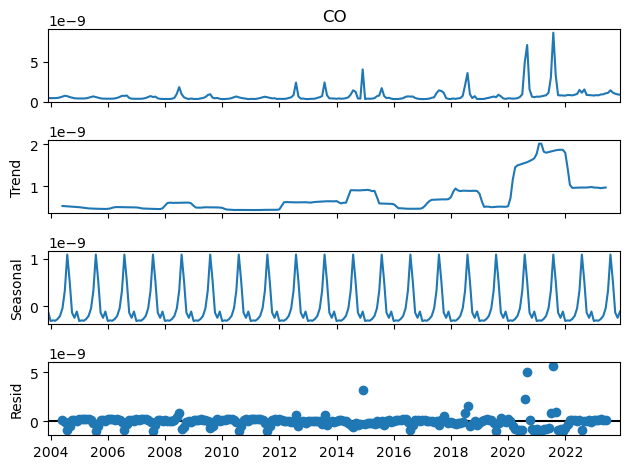

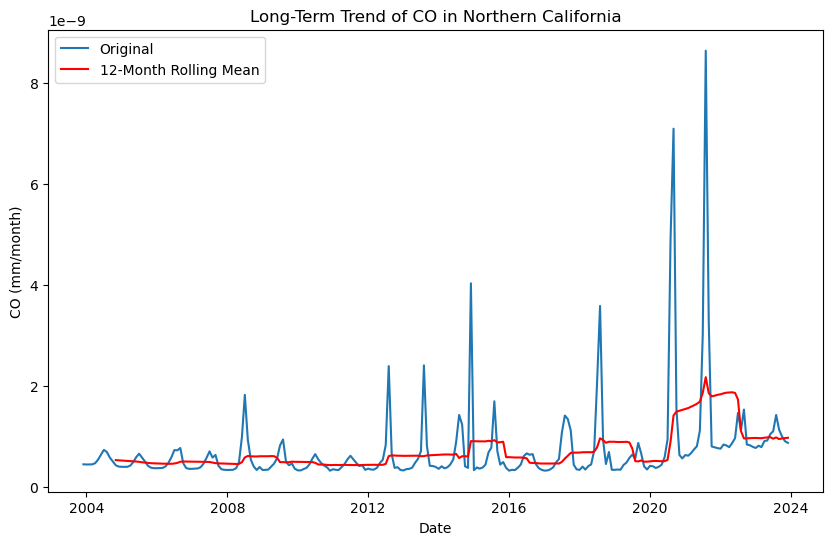

In [10]:
#Part 1: Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(df_clean['CO'], model='additive', period=12)
decomposition.plot()
plt.show()

#Apply rolling mean to analyze long-term trends
df_clean['Rolling Mean'] = df_clean['CO'].rolling(window=12).mean()

#Plot the original series with the rolling mean
plt.figure(figsize=(10, 6))
plt.plot(df_clean['CO'], label='Original')
plt.plot(df_clean['Rolling Mean'], label='12-Month Rolling Mean', color='red')
plt.xlabel('Date')
plt.ylabel('CO (mm/month)')
plt.title('Long-Term Trend of CO in Northern California')
plt.legend()
plt.show()

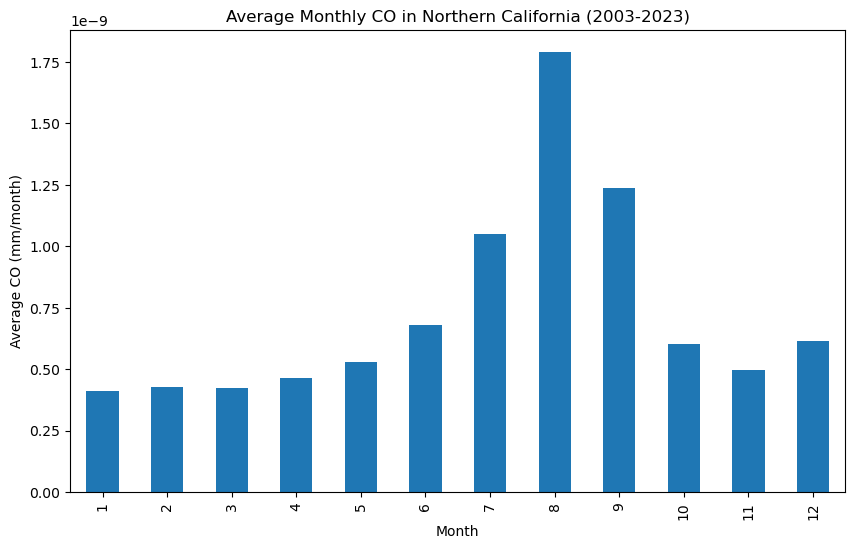

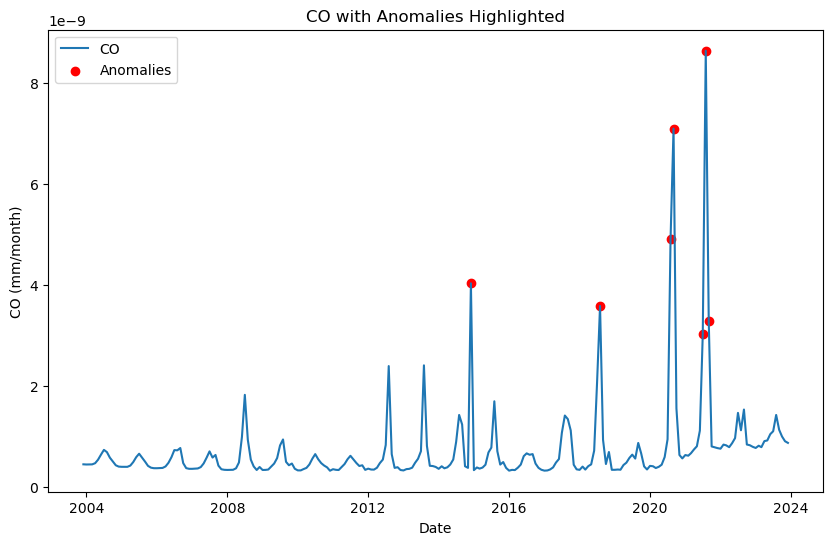

In [11]:
#Part 2: Analyze seasonal patterns by grouping data by month
df_clean['Month'] = df_clean.index.month
monthly_avg = df_clean.groupby('Month')['CO'].mean()

# Plot the average precipitation per month
plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average CO (mm/month)')
plt.title('Average Monthly CO in Northern California (2003-2023)')
plt.show()

#Part 3: Identify anomalies using Z-score and Plot precipitation with anomalies highlighted
df_clean['Z-score'] = (df_clean['CO'] - df_clean['CO'].mean()) / df_clean['CO'].std()

plt.figure(figsize=(10, 6))
plt.plot(df_clean.index, df_clean['CO'], label='CO')
plt.scatter(df_clean.index[df_clean['Z-score'] > 2], df_clean['CO'][df_clean['Z-score'] > 2], color='red', label='Anomalies')
plt.xlabel('Date')
plt.ylabel('CO (mm/month)')
plt.title('CO with Anomalies Highlighted')
plt.legend()
plt.show()

In [12]:
!pip install pymannkendall
import pymannkendall as mk
#Determines if they is an increase or decrease in precipitation over time

#Perform Mann-Kendall test to check for monotonic trends
result = mk.original_test(df_clean['CO'])

#Print the test result
print(result)

Mann_Kendall_Test(trend='increasing', h=True, p=2.3326488518549127e-08, z=5.585324023295498, Tau=0.24163208852005533, s=6988.0, var_s=1564893.3333333333, slope=1.1882615253623193e-12, intercept=3.309594819565217e-10)


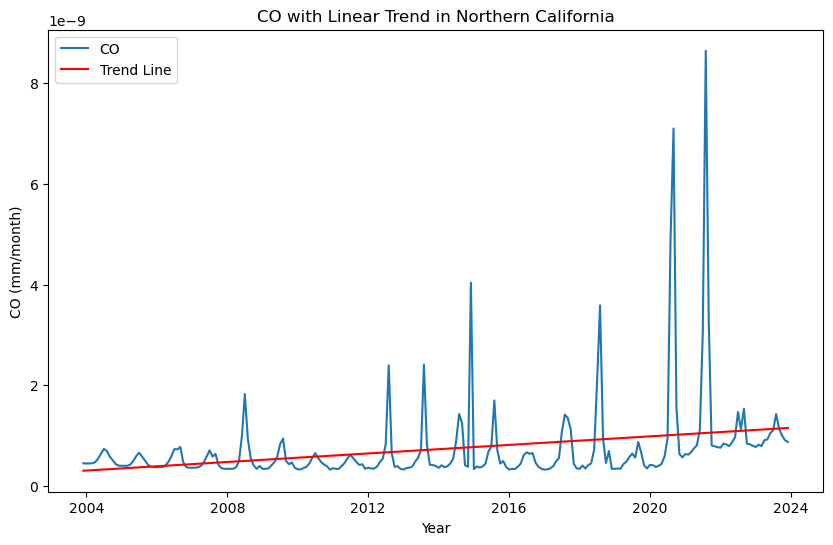

Slope of the trend line: 4.24444210452215e-11


In [13]:
from sklearn.linear_model import LinearRegression
import numpy as np

#Create a new column for the numerical representation of the date
df_clean['Year'] = df_clean.index.year + df_clean.index.month / 12

#Prepare the data for linear regression
X = df_clean['Year'].values.reshape(-1, 1)  # Independent variable (Year)
y = df_clean['CO'].values  # Dependent variable (Precipitation)

#Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

#Predict the trend line
df_clean['Trend Line'] = model.predict(X)

#Plot the original precipitation and the trend line
plt.figure(figsize=(10, 6))
plt.plot(df_clean.index, df_clean['CO'], label='CO')
plt.plot(df_clean.index, df_clean['Trend Line'], label='Trend Line', color='red')
plt.title('CO with Linear Trend in Northern California')
plt.xlabel('Year')
plt.ylabel('CO (mm/month)')
plt.legend()
plt.show()

#Print the slope to check if it's negative
slope = model.coef_[0]
print(f"Slope of the trend line: {slope}")